Рассмотрим начально-краевую задачу для одномерного уравнения теплопроводности:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}
$$


c краевыми условиями $(t \geqslant 0)$

$$
u(0, t) = u(1, t) = 0
$$

и начальным условием $(0 < x < 1)$

$$
u(x, 0) = \sin{\pi x} \;.
$$

Требуется написать программу, строящую решение в области $0 \leqslant x \leqslant 1$ и $t \geqslant 0$ с использованием конечно-разностной неявной схемы на четырехточечном шаблоне.

Решение визуализировать, сравнить с точным решением.

Рассчитать порядок точности схемы и сравнить с порядком аппроксимации.

Аналитическое решение уравнения: $$u(x, t) = e^{-\pi^2 t}\sin{\pi x}$$

Порядок аппроксимации: $O(\tau + h^2)$

Схема устойчива при любых значениях $\tau$ и h

In [16]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import math
import pylab
from mpl_toolkits.mplot3d import Axes3D

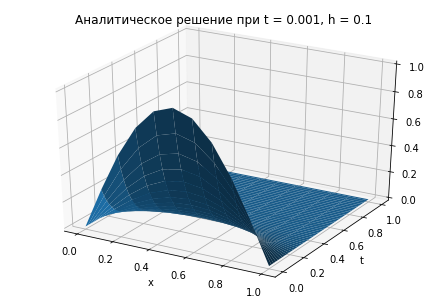

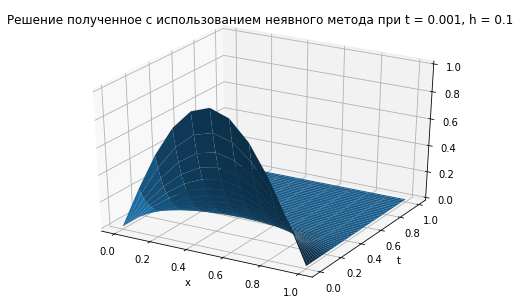

In [17]:
def sch(t, h):
    tsize = 1 + int(1 / t)   
    hsize = 1 + int(1 / h)  
    u = np.zeros((hsize, tsize))
    sgm = t / (h**2)
    i=0
    while(i < hsize - 1):
        u[i][0] = np.sin(np.pi * h * i) 
        i += 1
        
    alpha = [0]
    beta = [0]

    a = np.zeros(hsize)
    b = np.zeros(hsize)
    c = np.zeros(hsize)
    x = np.zeros(hsize)
    d = np.zeros(hsize)
    
    i=1
    while(i < hsize - 1):
        d[i] = np.sin(np.pi * h * i) 
        i += 1

    #поддиагональ    
    i=1 
    while(i < hsize):
        a[i] = -sgm 
        i += 1
    #наддиагональ
    i=0
    while(i < hsize-1):
        b[i] = -sgm  
        i += 1
    #диагональ трехдиагональной матрицы
    i=0
    while(i < hsize):
        c[i] = 2*sgm + 1 
        i += 1

    for i in range(hsize-1):
        alpha.append(-b[i]/(a[i]*alpha[i] + c[i]))
        beta.append((d[i] - a[i]*beta[i])/(a[i]*alpha[i] + c[i]))

    x[hsize-1] = (d[hsize-1] - a[hsize-2]*beta[hsize-1])/(c[hsize-1] + a[hsize-2]*alpha[hsize-1])

    for i in reversed(range(hsize-1)):
        x[i] = alpha[i+1]*x[i+1] + beta[i+1]    
            
    d = x
    d[0] = 0
    d[hsize-1] = 0
    u[:, 1] = d
    j = 2    

    while(la.linalg.norm(u[:, j-2]-u[:, j-1]) > 1e-5):
        alpha = [0]
        beta = [0]

        a = np.zeros(hsize)
        b = np.zeros(hsize)
        c = np.zeros(hsize)
        x = np.zeros(hsize)

        i=1
        while(i < hsize):
            a[i] = -sgm 
            i += 1

        i=0
        while(i < hsize-1):
            b[i] = -sgm  
            i += 1

        i=0
        while(i < hsize):
            c[i] = 2*sgm + 1 
            i += 1

        for i in range(hsize-1):
            alpha.append(-b[i]/(a[i]*alpha[i] + c[i]))
            beta.append((d[i] - a[i]*beta[i])/(a[i]*alpha[i] + c[i]))

        x[hsize-1] = (d[hsize-1] - a[hsize-2]*beta[hsize-1])/(c[hsize-1] + a[hsize-2]*alpha[hsize-1])

        for i in reversed(range(hsize-1)):
            x[i] = alpha[i+1]*x[i+1] + beta[i+1]

        d = x   
        d[0] = 0
        d[hsize-1] = 0
        u[:, j] = d
        j += 1     
   
    x = np.arange(0, 1 + h, h)
    y = np.arange(0, 1 + t, t)
    xgrid, ygrid = np.meshgrid(x, y) 
    u_a =  np.exp(-ygrid * np.pi**2) * (np.sin(np.pi * xgrid))  
    return u_a, np.transpose(u), xgrid, ygrid

h = 0.1
t = 0.001

u_a, u_sch, xgrid, ygrid = sch(t, h)
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xgrid, ygrid, u_a)
pylab.xlabel("x")
pylab.ylabel("t")
title = "Аналитическое решение при t = " + str(t) + ", h = " + str(h)
pylab.title(title)
pylab.show()
    
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xgrid, ygrid, u_sch)
pylab.xlabel("x")
pylab.ylabel("t")
title = "Решение полученное с использованием неявного метода при t = " + str(t) + ", h = " + str(h)
pylab.title(title)
pylab.show()

In [18]:
def rmse(u_a, u_sch):
    rmse = [sum(abs(np.array(u_a[:,i]) - np.array(u_sch[:,i]))) for i in range(u_sch.shape[1])]
    return sum(rmse) / (u_sch.shape[0] * u_sch.shape[1])
err = rmse(u_a, u_sch)
print(err)

0.0031178871761074955


In [19]:
h=0.05
t1=0.0001
t2=0.0002
t3=0.0004
u_a, u_sch, xgrid, ygrid = sch(t1, h)
err1 = rmse(u_a, u_sch)
u_a, u_sch, xgrid, ygrid = sch(t2, h)
err2 = rmse(u_a, u_sch)
u_a, u_sch, xgrid, ygrid = sch(t3, h)
err3 = rmse(u_a, u_sch)
print("h равняется", h)
print("Величина погрешности при t равном 0.0001 - ", err1)
print("Величина погрешности при t равном 0.0002 - ", err2)
print("Величина погрешности при t равном 0.0004 - ", err3)

h равняется 0.05
Величина погрешности при t равном 0.0001 -  0.0008792086561994915
Величина погрешности при t равном 0.0002 -  0.0013237247003669178
Величина погрешности при t равном 0.0004 -  0.002253388880543524


In [22]:
err3/err2

1.7023093094197885

In [23]:
err3/err1

2.5629739478272753

In [24]:
t=0.0001
h1=0.05
h2=0.1
h3=0.2
u_a, u_sch, xgrid, ygrid = sch(t, h1)
err1 = rmse(u_a, u_sch)
u_a, u_sch, xgrid, ygrid = sch(t, h2)
err2 = rmse(u_a, u_sch)
u_a, u_sch, xgrid, ygrid = sch(t, h3)
err3 = rmse(u_a, u_sch)
print("t равняется", t)
print("Величина погрешности при h равном 0.05 - ", err1)
print("Величина погрешности при h равном 0.1 - ", err2)
print("Величина погрешности при h равном 0.2 - ", err3)

t равняется 0.0001
Величина погрешности при h равном 0.05 -  0.0008792086561994915
Величина погрешности при h равном 0.1 -  0.000989916149082432
Величина погрешности при h равном 0.2 -  0.0020876106390356483


In [25]:
err3/err2

2.1088762325684716

In [26]:
err3/err1

2.3744200245475877